## Analysis of Traffic on I-94

In this project I will be examining the factors that may lead to heavier traffic on I-94. This data can then be used to determine when traffic will most likely be the heaviest and maybe even to help prevent this from occuring.

In [1]:
import pandas as pd

In [2]:
Metro_Traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
Metro_Traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
Metro_Traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
Metro_Traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

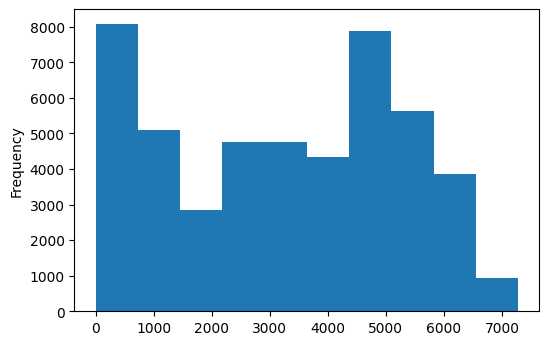

In [7]:
Metro_Traffic['traffic_volume'].plot.hist()
plt.show()

In [8]:
Metro_Traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There are many times where there is no traffic at all and presumably those are nighttime hours. After removing the low traffic hours it follows a normal distribution centered around 4,000 to 5,000 cars per hour.

In [9]:
Metro_Traffic['date_time'] = pd.to_datetime(Metro_Traffic['date_time'])

In [10]:
day = Metro_Traffic.copy()[(Metro_Traffic['date_time'].dt.hour >= 7) & (Metro_Traffic['date_time'].dt.hour < 19)]
print(day.shape)


(23877, 9)


In [11]:
night = Metro_Traffic.copy()[(Metro_Traffic['date_time'].dt.hour >= 19) | (Metro_Traffic['date_time'].dt.hour < 7)]
print(night.shape)

(24327, 9)


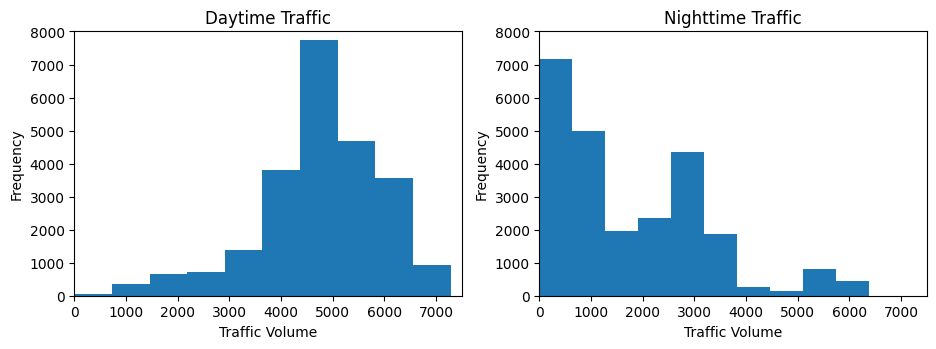

In [12]:
plt.figure(figsize = (11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.show()


In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [14]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The daytime traffic graph is left skewed which means higher traffic levels are more likely to occur during the daytime. The nighttime traffic graph is right skewed which tells us that high volumes of traffic are rare at night.

We will only focus on daytime data from now on since we are trying to determine the cause

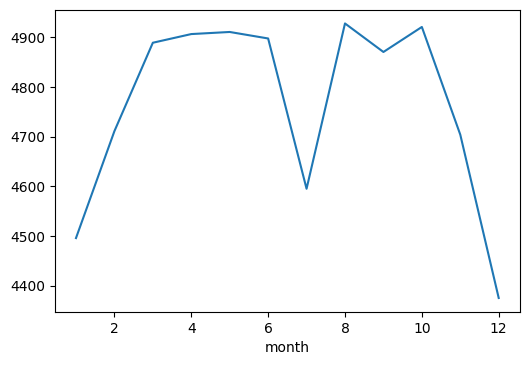

In [18]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic seems to be lower in the colder months, excluding July. January and December both show very low traffic volume levels, while July also has abnormally low traffic for the summer months.

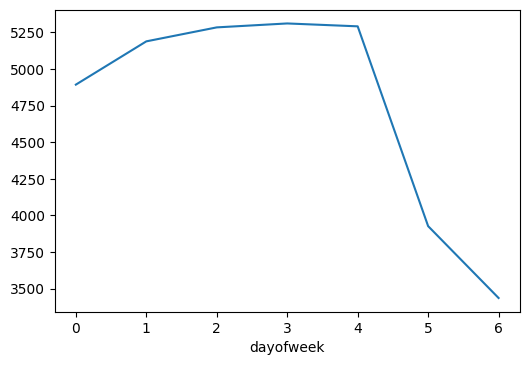

In [20]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
# 0 is Monday, 6 is Sunday
plt.show()

Traffic is significantly lower on the weekends. Workdays seem to have a higher volume of traffic.

In [21]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


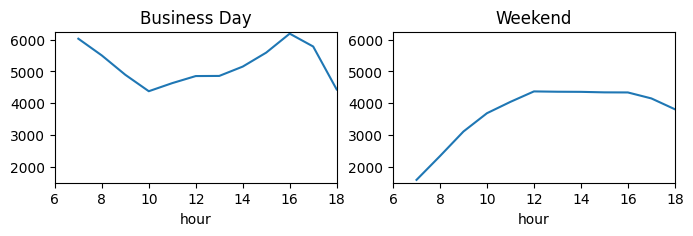

In [39]:
plt.figure(figsize = (8, 2))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Day')
plt.xlim(6, 18)
plt.ylim(1500, 6250)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.xlim(6, 18)
plt.ylim(1500, 6250)

plt.show()

Business days have their heaviest traffic around 7 am and 4 pm. Weekends have their heaviest traffic around 12pm and it holds pretty steady for the rest of the day.

Business days see a drop in traffic once everyone has arrived at work around 10 am, and traffic drops off at around 6 pm.
Weekends have very low traffic until around 9 am as most people will be sleeping in later on the weekends.

In [40]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

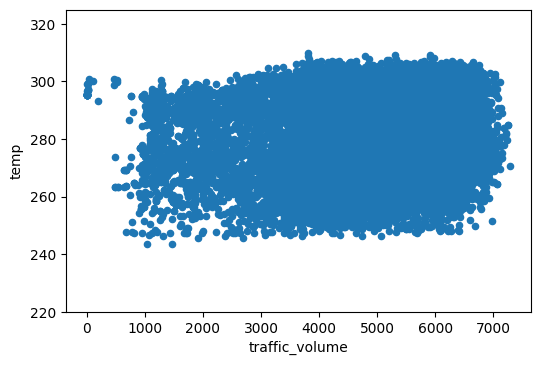

In [44]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(220, 325)
plt.show()

It does not seem like the temperature is effecting the traffic volume.

In [45]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

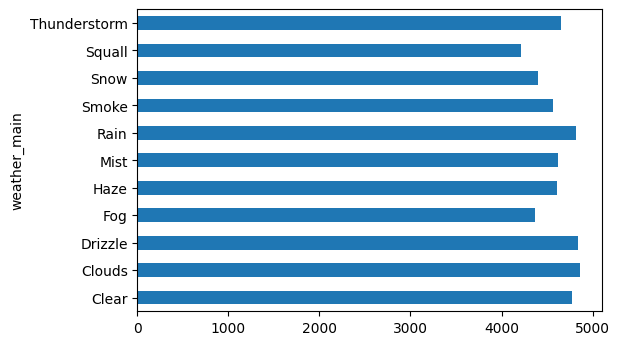

In [48]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

None of the types of weather cause the traffic volume to exceep 5,000 cars. The heaviest traffic indicators according to this graph are clouds, drizzle, and rain, with clear and thunderstorm right behind.


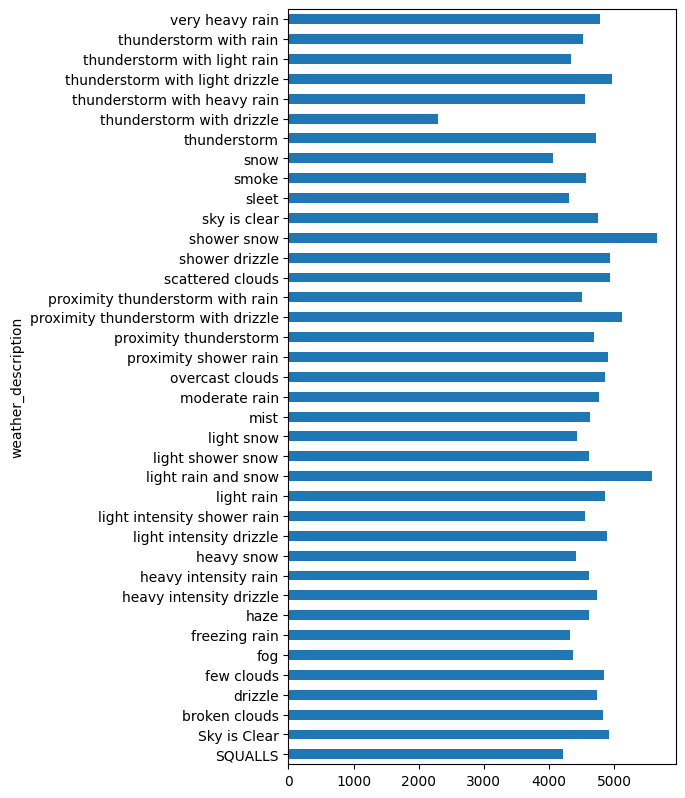

In [58]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()


Two types of weather have a volume exceeding 5,000 cars:Shower Snow and Light Rain and Snow.

It seems that the best indicator of heavy traffic is day of the week. Business days have a far heavier traffic volume than weekends. The volume is much higher during the mornings and evenings of business days than at night.
If there is any snow the traffic volume increases, but otherwise weather does not seem to have as much of an effect.

Traffic is also higher in the warmer months(March through October).